In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/penguins_size.csv')#reading the csv file

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.shape

(344, 7)

##REMOVING NULL/ABSURD VALUES

Remove the null values before data visualization

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.isnull().sum()#To check the total number of null values

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
#Removing null values in numerical columns by replacing with  median
df.culmen_length_mm .fillna(df.culmen_length_mm.median(),inplace=True)
df.culmen_depth_mm.fillna(df.culmen_depth_mm.median(),inplace=True)
df.flipper_length_mm.fillna(df.flipper_length_mm.median(),inplace=True)
df.body_mass_g.fillna(df.body_mass_g.median(),inplace=True)

In [9]:
#Removing null values in categorical columns by replacing with mode
df.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [16]:
df.sex.fillna(df.sex.mode().iloc[0],inplace=True)

In [17]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [18]:
#Removing special characters
df.sex.value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [22]:
df['sex'].replace(".", "MALE", inplace=True)

In [23]:
df.sex.value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

##DESCRIPTIVE STATISTICS

In [24]:
#Statistics Description of numerical columns
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.925000,17.152035,200.892442,4200.872093
std,5.443792,1.969060,14.023826,799.696532
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


##VISUALIZATION


###UNIVARIATE

<ipython-input-25-24e9b5890c61>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.culmen_length_mm)


<Axes: xlabel='culmen_length_mm', ylabel='Density'>

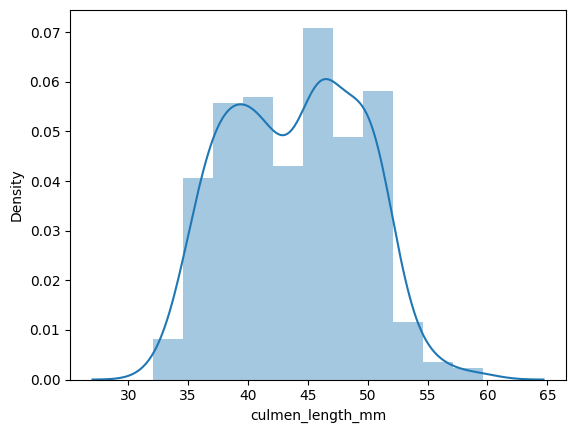

In [25]:
sns.distplot(df.culmen_length_mm)

<ipython-input-26-4b07ffb4fe44>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.culmen_depth_mm)


<Axes: xlabel='culmen_depth_mm', ylabel='Density'>

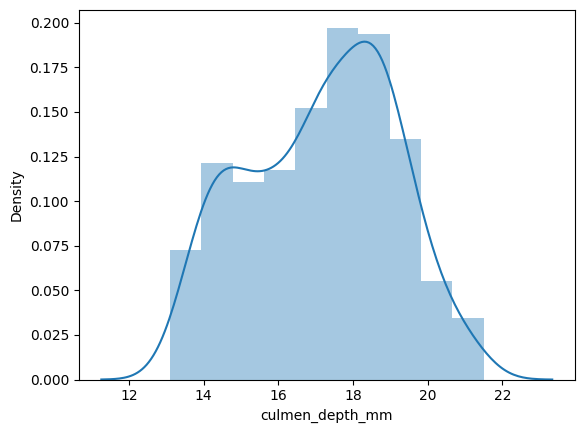

In [26]:
sns.distplot(df.culmen_depth_mm)

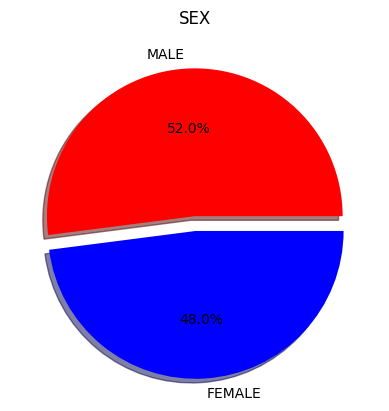

In [27]:
plt.pie(df.sex.value_counts(),[0,0.1],labels=['MALE','FEMALE'],autopct='%1.1f%%',shadow=True,colors=['r','b'])
plt.title('SEX')
plt.show()

In [28]:
df.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

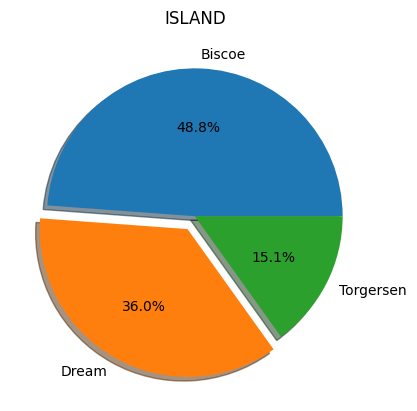

In [29]:
plt.pie(df.island.value_counts(),[0,0.1,0],labels=['Biscoe','Dream','Torgersen'],autopct='%1.1f%%',shadow=True)
plt.title('ISLAND')
plt.show()

###BIVARIATE ANALYSIS

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

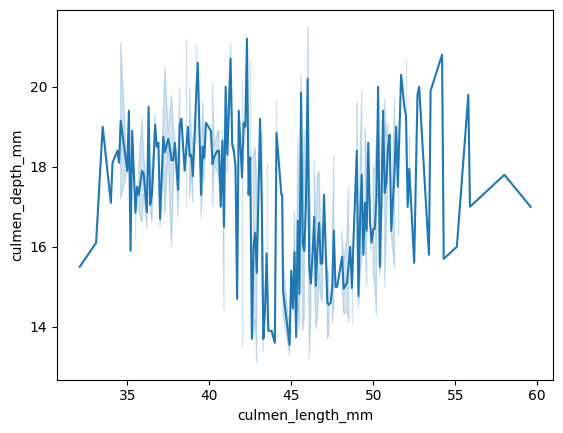

In [30]:
sns.lineplot(x=df.culmen_length_mm,y=df.culmen_depth_mm)

<Axes: xlabel='body_mass_g', ylabel='culmen_length_mm'>

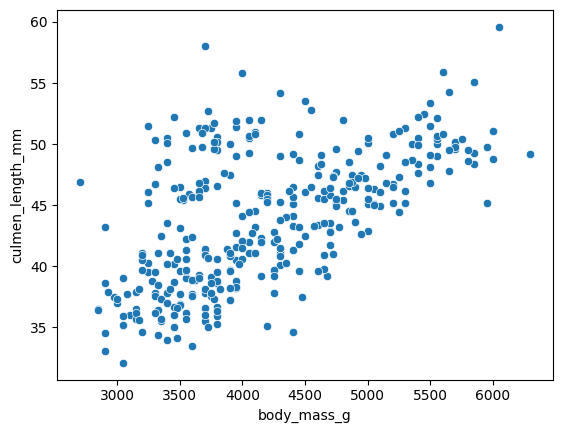

In [31]:
sns.scatterplot(x=df.body_mass_g,y=df.culmen_length_mm)

<Axes: xlabel='body_mass_g', ylabel='culmen_depth_mm'>

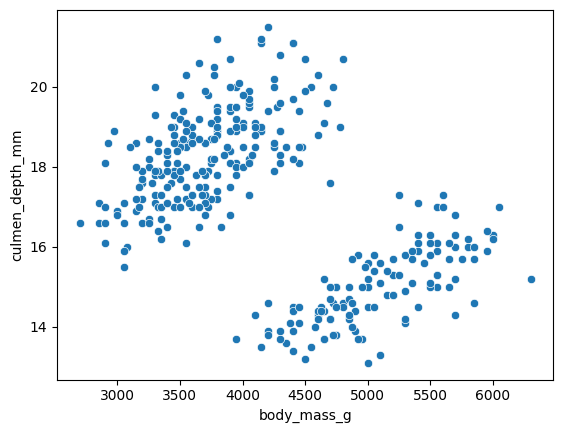

In [32]:
sns.scatterplot(x=df.body_mass_g,y=df.culmen_depth_mm)

<Axes: xlabel='body_mass_g', ylabel='culmen_depth_mm'>

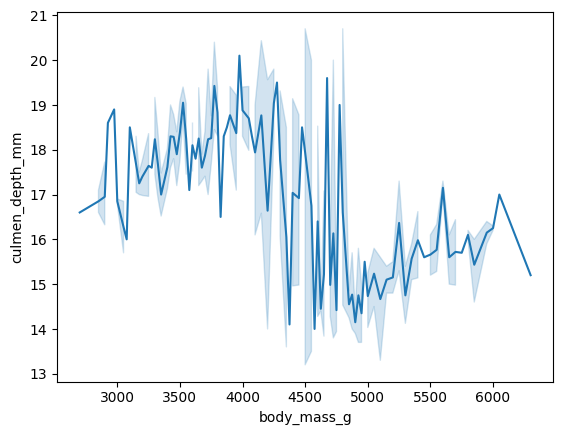

In [33]:
sns.lineplot(x=df.body_mass_g,y=df.culmen_depth_mm)

###MULTIVARIATE ANALYSIS

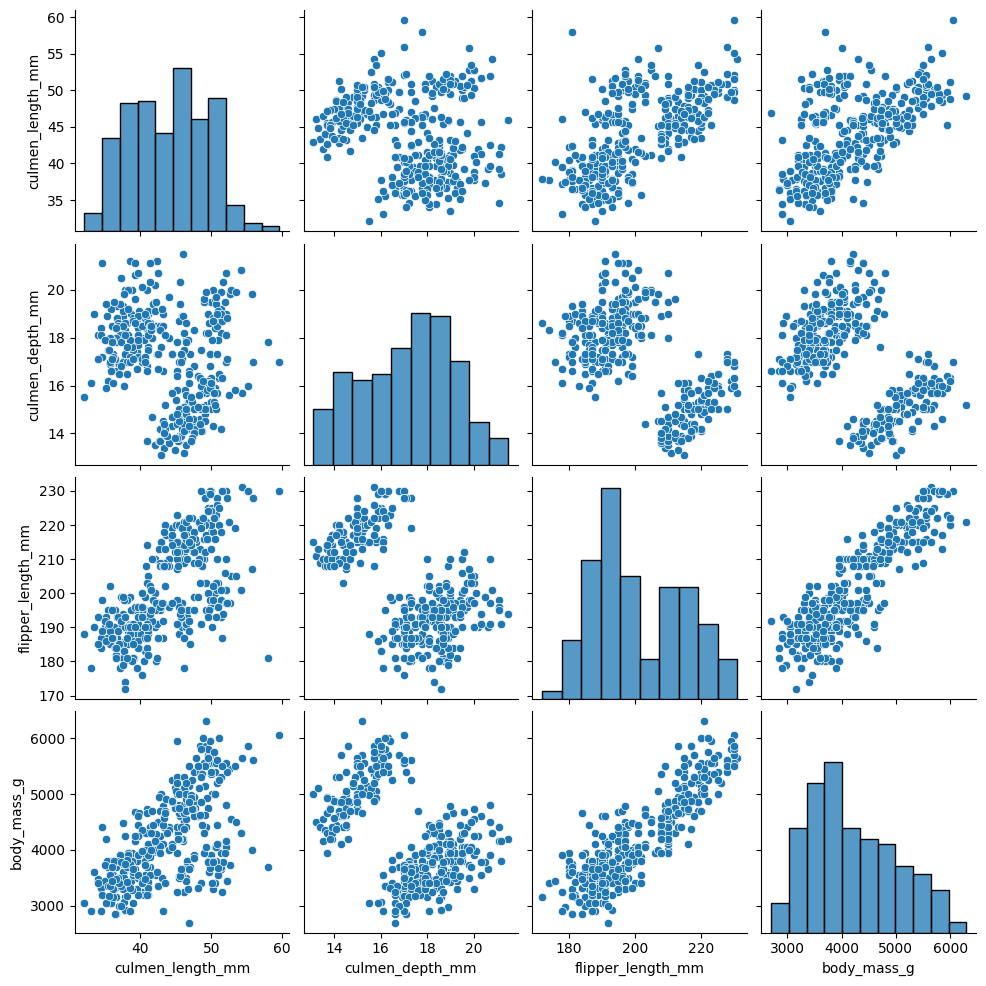

In [34]:
sns.pairplot(df)

<ipython-input-35-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

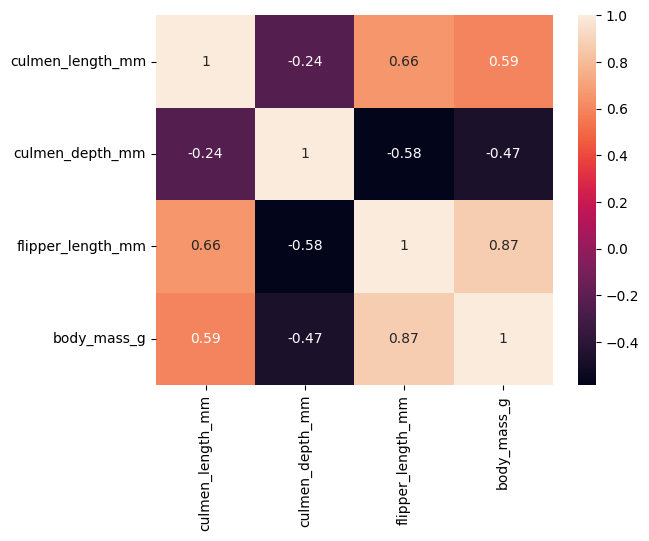

In [35]:
sns.heatmap(df.corr(),annot=True)

##OUTLIER DETECTION AND REMOVAL

<Axes: >

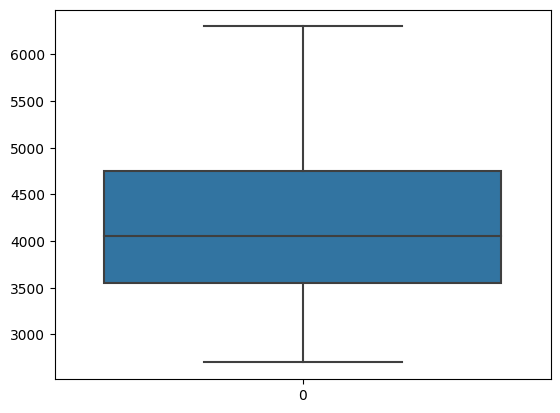

In [37]:
sns.boxplot(df.body_mass_g)

<Axes: >

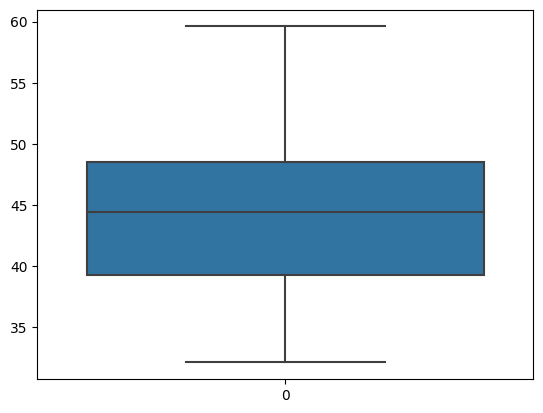

In [38]:
sns.boxplot(df.culmen_length_mm)

<Axes: >

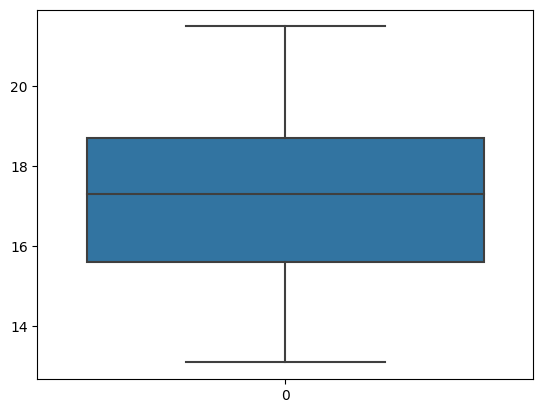

In [39]:
sns.boxplot(df.culmen_depth_mm)

<Axes: >

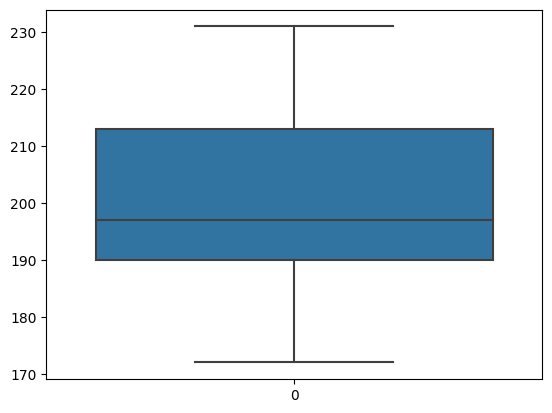

In [40]:
sns.boxplot(df.flipper_length_mm)

Therefore, No outliers are present

##ENCODING THE CATEGORICAL COLUMNS

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [45]:
df.species=le.fit_transform(df.species)
df.island=le.fit_transform(df.island)
df.sex=le.fit_transform(df.sex)

In [46]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,1
4,0,2,36.70,19.3,193.0,3450.0,0


#CORRELATION BETWEEN THE COLUMNS

In [47]:
df.corr()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.635659,0.728706,-0.741282,0.850819,0.747547,0.010240
island,-0.635659,1.000000,-0.351189,0.567701,-0.562957,-0.558500,0.002893
culmen_length_mm,0.728706,-0.351189,1.000000,-0.235000,0.655858,0.594925,0.322871
culmen_depth_mm,-0.741282,0.567701,-0.235000,1.000000,-0.583832,-0.471942,0.354791
flipper_length_mm,0.850819,-0.562957,0.655858,-0.583832,1.000000,0.871221,0.241941
body_mass_g,0.747547,-0.558500,0.594925,-0.471942,0.871221,1.000000,0.407107
sex,0.010240,0.002893,0.322871,0.354791,0.241941,0.407107,1.000000


<Axes: >

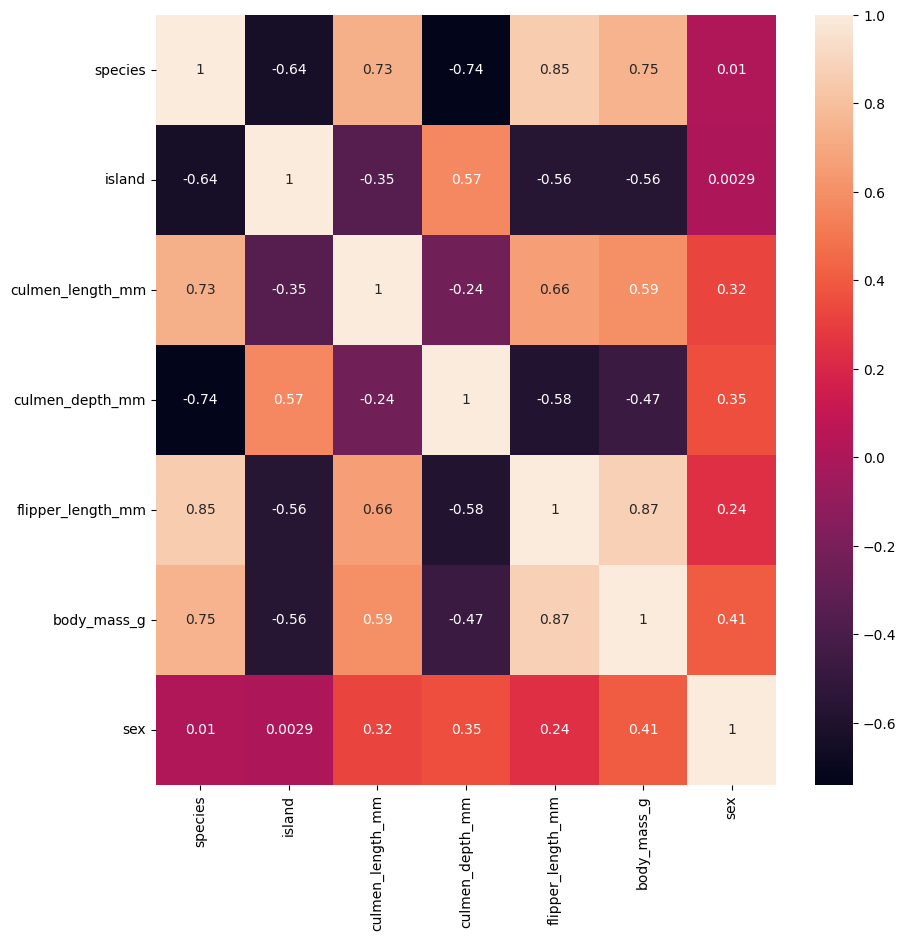

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [49]:
#Correlation of independent variables with the target
df.corr().species.sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex                  0.010240
island              -0.635659
culmen_depth_mm     -0.741282
Name: species, dtype: float64

##SPLITTING DATA

In [52]:
#INDEPENDENT VARIABLE
y=df.species
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [53]:
#DEPENDENT VARIABLE
X=df.drop(columns=['species'],axis=1)
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,1
1,2,39.50,17.4,186.0,3800.0,0
2,2,40.30,18.0,195.0,3250.0,0
3,2,44.45,17.3,197.0,4050.0,1
4,2,36.70,19.3,193.0,3450.0,0


##SCALING THE INDEPENDENT VARIABLES

In [54]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [56]:
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)

In [57]:
X_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0


##TRAIN TEST SPLIT

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=5)

In [59]:
x_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
157,0.5,0.476364,0.559524,0.440678,0.347222,0.0
201,0.5,0.643636,0.500000,0.440678,0.270833,0.0
98,0.5,0.036364,0.357143,0.101695,0.055556,0.0
268,0.0,0.465455,0.023810,0.694915,0.666667,0.0
213,0.5,0.534545,0.404762,0.288136,0.263889,0.0


In [63]:
x_test.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
47,0.5,0.196364,0.690476,0.118644,0.076389,1.0
320,0.0,0.596364,0.226190,0.796610,0.597222,0.0
76,1.0,0.320000,0.440476,0.322034,0.277778,0.0
325,0.0,0.534545,0.357143,0.728814,0.777778,1.0
42,0.5,0.141818,0.642857,0.237288,0.111111,0.0


In [60]:
y_train.head()

157    1
201    1
98     0
268    2
213    1
Name: species, dtype: int64

SHAPE OF TRAINING AND TESTING

In [61]:
x_train.shape

(275, 6)

In [62]:
x_test.shape

(69, 6)